### Name: Rohan Ingle
### PRN: 22070126047
### Batch: AIML A2 (2022-2026)

### Dimensionality Reduction

About dataset : Football Manager Dataset | source: <a href="[#](https://www.kaggle.com/datasets/ajinkyablaze/football-manager-data)">Kaggle</a>

This dataset has 89 columns and 159541 rows, the features are :

['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional', 'Sportsmanship', 'Temperament',
       'Controversy', 'PositionsDesc', 'Goalkeeper', 'Sweeper', 'Striker',
       'AttackingMidCentral', 'AttackingMidLeft', 'AttackingMidRight',
       'DefenderCentral', 'DefenderLeft', 'DefenderRight',
       'DefensiveMidfielder', 'MidfielderCentral', 'MidfielderLeft',
       'MidfielderRight', 'WingBackLeft', 'WingBackRight']

Unique Identifier (UID): Every entry has a unique ID.

Personal Information: This includes attributes like 'Name', 'NationID', 'Born' (date of birth formatted as DD-MM-YYYY), 'Age'.

Career Information: International caps ('IntCaps'), international goals ('IntGoals'), under-21 caps ('U21Caps'), and under-21 goals ('U21Goals').

Physical Attributes: Attributes such as 'Height' and 'Weight'.

Skill Ratings: Various skills are rated, possibly on a scale from 1 to 20, including 'AerialAbility', 'Dribbling', 'Finishing', and many more, indicating a player's abilities in specific areas.

Positional Play Ratings: Attributes indicate suitability in various playing positions, such as 'DefenderCentral', 'MidfielderCentral', 'WingBackLeft', etc., with values likely indicating proficiency or preferred playing positions.

This dataset is aquired from a game called Football Manager

First lets start by importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')

The below cell will be used to load our dataset into a dataframe using Pandas library - since we imported pandas as pd, we can use pd.read_csv(_dataset path_) to directly read our dataset from csv fromat and store in a pandas dataframe

In [2]:
dataset = pd.read_csv(r'../dataset.csv')

Note : Columns are vertically arranged and are also called features of a dataset

Lets see how our dataset looks like using below cell, we will just type the dataframe variable name and run it

In [3]:
dataset.head(5)

,UID,Name,NationID,Born,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
0,1000055,Wilfred Bamnjo,11,27-03-1980,36,0,0,0,0,178,...,1,1,1,1,20,11,1,1,1,1
1,1000331,Wang Wei,110,20-02-1982,34,0,0,0,0,188,...,1,1,1,1,1,1,1,1,1,1
2,1000334,Liu Yang,110,11-04-1982,34,0,0,0,0,183,...,1,1,1,1,20,1,1,1,1,1
3,1000337,Song Qi,110,07-04-1985,31,0,0,0,0,170,...,1,1,1,1,1,1,1,1,1,1
4,1000340,Chen Lei,110,20-01-1983,33,0,0,0,0,181,...,1,1,1,1,1,1,1,1,1,1


In [4]:
dataset.columns

Index(['UID', 'Name', 'NationID', 'Born', 'Age', 'IntCaps', 'IntGoals',
       'U21Caps', 'U21Goals', 'Height', 'Weight', 'AerialAbility',
       'CommandOfArea', 'Communication', 'Eccentricity', 'Handling', 'Kicking',
       'OneOnOnes', 'Reflexes', 'RushingOut', 'TendencyToPunch', 'Throwing',
       'Corners', 'Crossing', 'Dribbling', 'Finishing', 'FirstTouch',
       'Freekicks', 'Heading', 'LongShots', 'Longthrows', 'Marking', 'Passing',
       'PenaltyTaking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decisions',
       'Determination', 'Flair', 'Leadership', 'OffTheBall', 'Positioning',
       'Teamwork', 'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping',
       'LeftFoot', 'NaturalFitness', 'Pace', 'RightFoot', 'Stamina',
       'Strength', 'Consistency', 'Dirtiness', 'ImportantMatches',
       'InjuryProness', 'Versatility', 'Adaptability', 'Ambition', 'Loyalty',
       'Pressure', 'Professional',

Now, we will check if our dataset has any null values or not using the below cell

In [5]:
dataset.isna().sum()

UID                  0
Name                 0
NationID             0
Born                 0
Age                  0
                    ..
MidfielderCentral    0
MidfielderLeft       0
MidfielderRight      0
WingBackLeft         0
WingBackRight        0
Length: 89, dtype: int64

Lets first check what features are non integer in our dataset

In [6]:
non_numerical_list = []

for col in dataset.columns:
    if not isinstance(dataset.loc[2, col], np.int64):
        non_numerical_list.append(col)

print(non_numerical_list)

['Name', 'Born', 'PositionsDesc']


In [7]:
for non_numerical_features in non_numerical_list:
    print(type(non_numerical_features))

<class 'str'>
<class 'str'>
<class 'str'>


Since we have features with values in a string format, we can either convert them to numerical format or drop them if they do not seem to be necessary

Since ['Name', 'Born', 'PositionsDesc'] dont seem to be useful since we have ['Age', 'UID'] we will drop them

In [8]:
dataset.drop(non_numerical_list, axis=1, inplace=True) # axis = 1 means we will drop the whole feature/column in the dataset, 
                                                           # inplace = true means it will remove from the current dataset variable itself so we dont need to assign a new variable to it

Lets find out correlation of each column with respect to all the other columns, this will tell us how closely are columns related to each other, correlation can range from -1 to 1, here -1 shows a completely negative correlation while 0 shows no correlation and 1 shows complete correlation

Lets use try catch method to check ig we can find correlation on our dataset

In [9]:
dataset.corr()

,UID,NationID,Age,IntCaps,IntGoals,U21Caps,U21Goals,Height,Weight,AerialAbility,...,AttackingMidRight,DefenderCentral,DefenderLeft,DefenderRight,DefensiveMidfielder,MidfielderCentral,MidfielderLeft,MidfielderRight,WingBackLeft,WingBackRight
UID,1.000000,-0.009804,-0.388877,-0.050315,-0.029079,-0.061178,-0.034010,-0.103174,-0.350750,-0.011338,...,-0.017132,0.001464,0.045357,0.025452,-0.101068,-0.102842,0.017628,-0.007614,-0.016929,-0.020714
NationID,-0.009804,1.000000,0.004971,0.015488,0.007297,0.029886,0.011905,0.016194,0.013216,-0.002696,...,0.003189,0.002852,-0.002065,-0.001628,-0.000060,-0.000730,-0.003387,-0.003970,0.000258,0.000251
Age,-0.388877,0.004971,1.000000,0.180082,0.103184,0.125745,0.067148,0.087572,0.369217,0.032067,...,0.016942,0.051544,0.014750,0.024954,0.114534,0.053703,0.039405,0.049761,0.060451,0.065009
IntCaps,-0.050315,0.015488,0.180082,1.000000,0.669068,0.261805,0.218760,0.015258,0.104522,-0.003347,...,0.046530,0.009123,0.013249,0.010542,0.045587,0.029385,0.046605,0.044486,0.025768,0.024390
IntGoals,-0.029079,0.007297,0.103184,0.669068,1.000000,0.155994,0.231453,0.002246,0.061026,-0.026810,...,0.060463,-0.026160,-0.017546,-0.021462,-0.002193,0.005958,0.036270,0.032262,-0.006823,-0.009877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MidfielderCentral,-0.102842,-0.000730,0.053703,0.029385,0.005958,0.042824,0.016696,-0.170485,0.049767,-0.196678,...,-0.003773,-0.170193,-0.149826,-0.115672,0.517072,1.000000,0.087566,0.141543,-0.084348,-0.040648
MidfielderLeft,0.017628,-0.003387,0.039405,0.046605,0.036270,0.060432,0.050414,-0.198742,0.059199,-0.145126,...,0.277573,-0.205633,0.158639,-0.096529,-0.048160,0.087566,1.000000,0.360436,0.295840,-0.017347
MidfielderRight,-0.007614,-0.003970,0.049761,0.044486,0.032262,0.062261,0.049308,-0.198604,0.059954,-0.148917,...,0.624753,-0.206215,-0.078520,0.111336,0.001896,0.141543,0.360436,1.000000,-0.018870,0.260455
WingBackLeft,-0.016929,0.000258,0.060451,0.025768,-0.006823,0.038335,-0.008860,-0.086667,0.066530,-0.102160,...,-0.076663,0.013049,0.737589,0.109112,-0.011027,-0.084348,0.295840,-0.018870,1.000000,0.181865


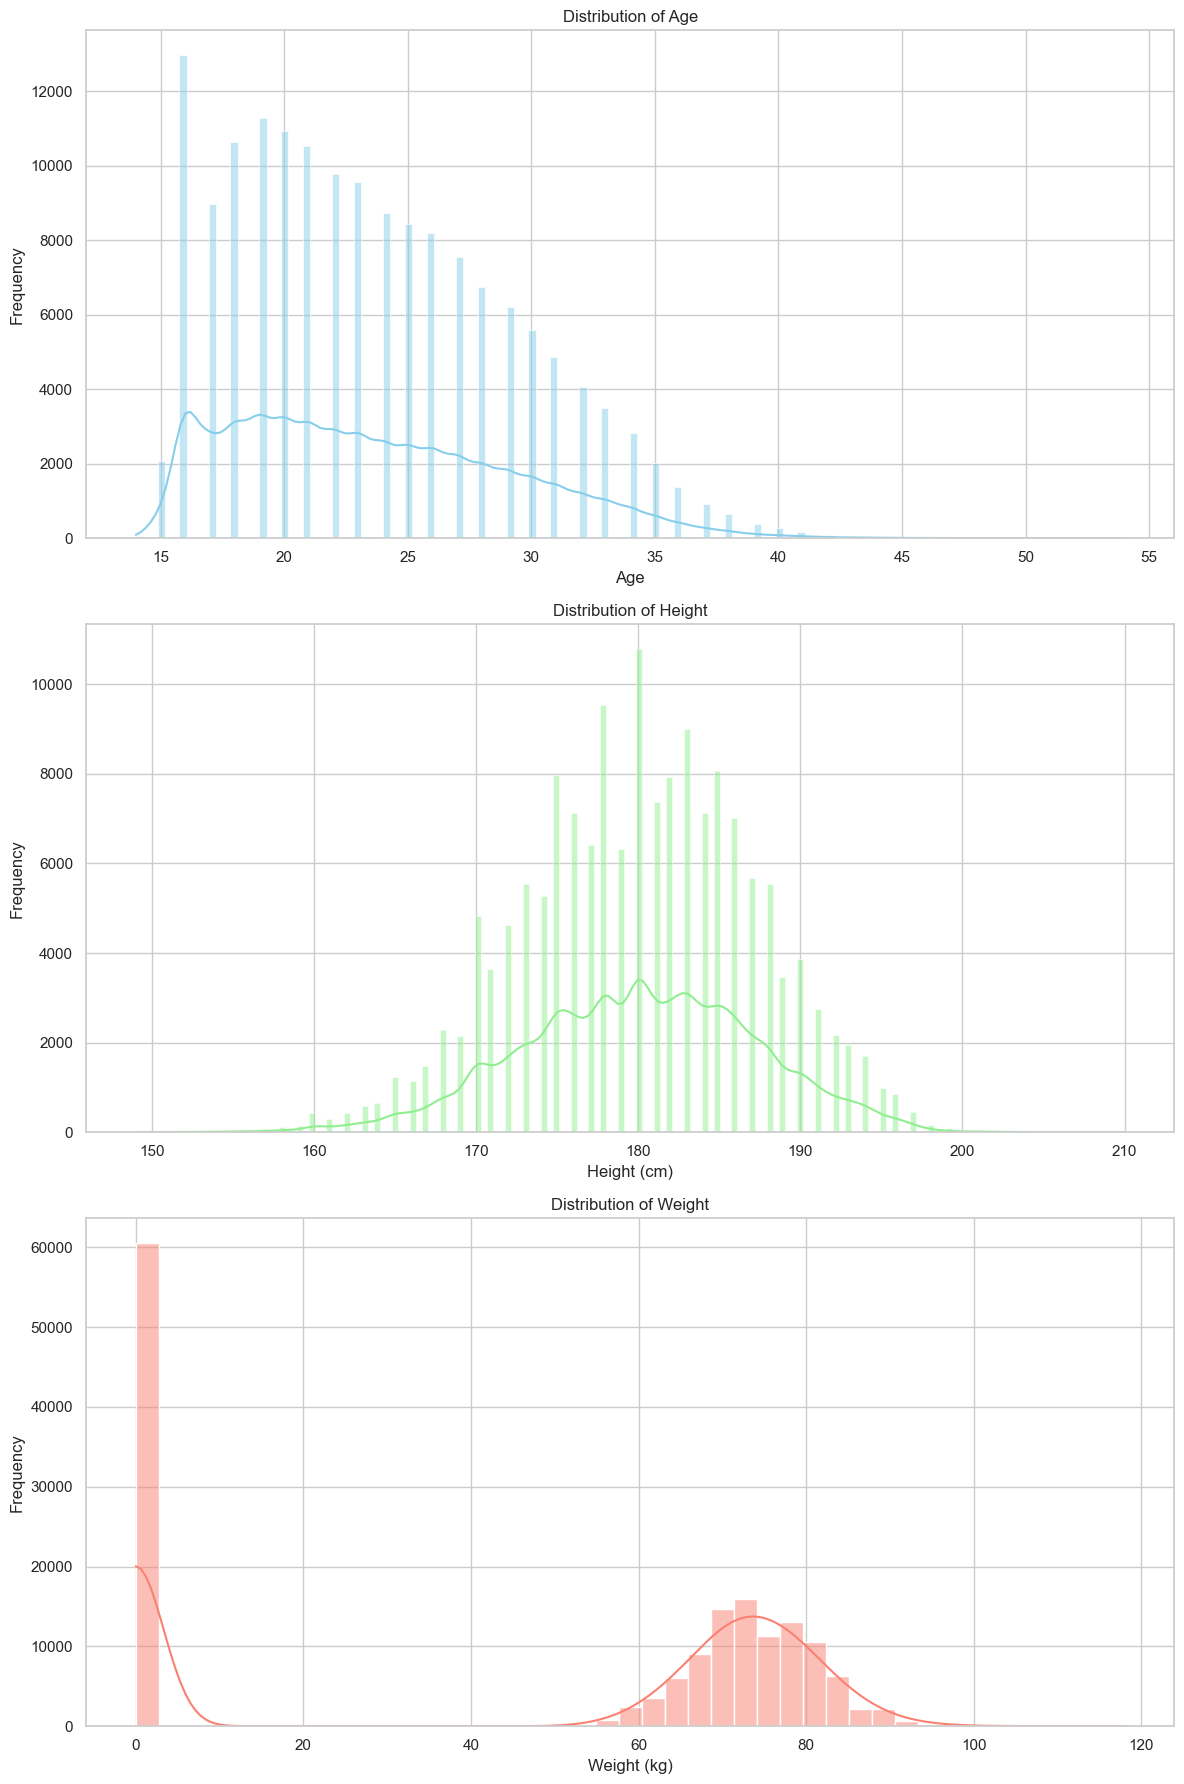

In [10]:
# Set the style of the plots
sns.set(style="whitegrid")

# Creating a figure to hold the subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Distribution of Age
sns.histplot(dataset['Age'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

# Distribution of Height
sns.histplot(dataset['Height'], kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Distribution of Height')
ax[1].set_xlabel('Height (cm)')
ax[1].set_ylabel('Frequency')

# Distribution of Weight
sns.histplot(dataset['Weight'], kde=True, ax=ax[2], color='salmon')
ax[2].set_title('Distribution of Weight')
ax[2].set_xlabel('Weight (kg)')
ax[2].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

Age Distribution: This histogram illustrates the distribution of player ages, complemented by a kernel density estimate that outlines the probability density of the data, showing where ages cluster most densely.

Height Distribution: This graph displays variations in player heights, offering insights into the range of physical statures across the dataset, which may be significant for different sports positions.

Weight Distribution: This chart shows how player weights are distributed, providing information on the overall physical attributes of the players, which may influence their suitability for specific roles or positions in sports

For visual thinkers I will plot a heatmap for the correlations to help understand better and derive outcomes faster

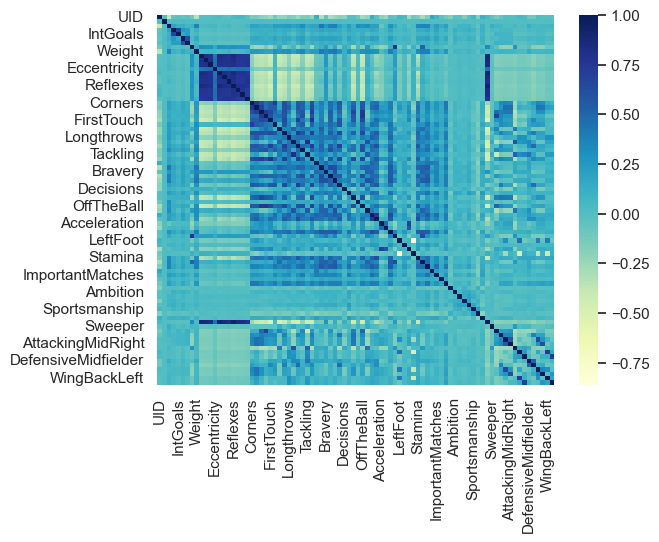

In [11]:
sns.heatmap(dataset.corr(), cmap="YlGnBu")
plt.show()

.... not the best kind of graph you see, this is because our dataset is high dimension dataset, since there are too many columns, the graph is a kind of hard to read, lets solve this issue by only picking up only the colums that we need

Lets first check the column names in our cleaned dataset

In [12]:
dataset.columns

Index(['UID', 'NationID', 'Age', 'IntCaps', 'IntGoals', 'U21Caps', 'U21Goals',
       'Height', 'Weight', 'AerialAbility', 'CommandOfArea', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'OneOnOnes', 'Reflexes',
       'RushingOut', 'TendencyToPunch', 'Throwing', 'Corners', 'Crossing',
       'Dribbling', 'Finishing', 'FirstTouch', 'Freekicks', 'Heading',
       'LongShots', 'Longthrows', 'Marking', 'Passing', 'PenaltyTaking',
       'Tackling', 'Technique', 'Aggression', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decisions', 'Determination',
       'Flair', 'Leadership', 'OffTheBall', 'Positioning', 'Teamwork',
       'Workrate', 'Acceleration', 'Agility', 'Balance', 'Jumping', 'LeftFoot',
       'NaturalFitness', 'Pace', 'RightFoot', 'Stamina', 'Strength',
       'Consistency', 'Dirtiness', 'ImportantMatches', 'InjuryProness',
       'Versatility', 'Adaptability', 'Ambition', 'Loyalty', 'Pressure',
       'Professional', 'Sportsmanship'

Let us take only necessary part from data that we want to find out correlation for 

In [13]:
dataset = dataset[['Age','Height', 'Weight','AerialAbility','Handling', 'Kicking','Reflexes','Throwing',
                    'Passing', 'Tackling','Teamwork', 'Acceleration', 'Agility', 'Balance', 'Jumping',
                    'Pace', 'Stamina', 'Strength']]

Now the we have dataset with only necessary columns, lets again check the correlation heatmap

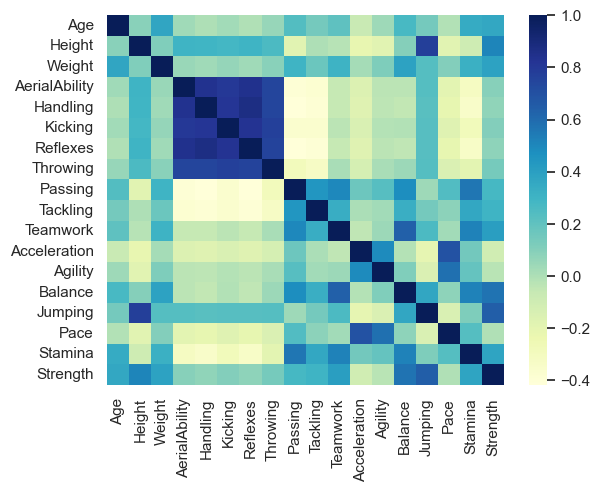

In [14]:
dataset_corr = sns.heatmap(dataset.corr(), cmap="YlGnBu")
plt.show()

The heatmap above shows us some insights on correlation of a column/feature with respect to others, this can be helpful in knowing how change in one feature can affect others

Now Lets get into Dimensionality reduction part, first we will start by making functions for LDA, PCA and SVD each

In [15]:
def apply_pca(data, n_components=None):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(data_scaled)
    return principal_components

def apply_lda(data, target, n_components=None):
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    lda_components = lda.fit_transform(data, target)
    return lda_components

def apply_svd(data, n_components=None):
    svd = TruncatedSVD(n_components=n_components)
    svd_components = svd.fit_transform(data)
    return svd_components

Now that we have made functions for each, we will now use them for dimensionality reduction in ouur dataset but first lets define our target feature and training features

We can also say this in the form of a problem satement where given a players 'Age', 'Height', 'Weight', 'Handling', 'Kicking', 'Reflexes' and 'Throwing' we want to predict the player's 'AerialAbility'

The main goal of this analysis is to examine how different physical and skill-related attributes of football players relate to their 'AerialAbility'. By studying these relationships, we aim to identify key factors that influence a player's effectiveness in aerial situations, which can aid coaches and team analysts in player assessments and strategy development.

In [16]:
target_feature = dataset['AerialAbility']
train_features = dataset[['Age','Height','Weight','Handling', 'Kicking','Reflexes','Throwing']]

Now lets verify that the selected features are stored right or not

In [17]:
target_feature.head(1)

0    1
Name: AerialAbility, dtype: int64

In [18]:
train_features.head(1)

,Age,Height,Weight,Handling,Kicking,Reflexes,Throwing
0,36,178,79,3,3,4,1


In [19]:
scaler = StandardScaler()

scaled_train_features = scaler.fit_transform(train_features)

train_features = pd.DataFrame(scaled_train_features, columns=train_features.columns)

Now lets split the dataset into training and testing sets since we should not train and evaluate the mdel on the same dataset to get accurate scores

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_features, target_feature, test_size=0.2, random_state=42)

Now lets define a function that will apply LDA, PCA and SVD on our training and testing dataset and train a LogisticRegression and evaluate it using each type of training data to 
check how applying various Dimensionality methods affect our model

In [21]:
def train_and_evaluate(X_train, X_test, y_train, y_test):

    # Here we will call our functions defined for LDA, PCA and SVD on both training and testing dataset
    X_train_pca = apply_pca(X_train, n_components=2)
    X_train_lda = apply_lda(X_train, y_train, n_components=1)
    X_train_svd = apply_svd(X_train, n_components=2)

    X_test_pca = apply_pca(X_test, n_components=2)
    X_test_lda = apply_lda(X_test, y_test, n_components=1)
    X_test_svd = apply_svd(X_test, n_components=2)
    
    model = LogisticRegression()
    
    # We will also evaluate our model without any dimensionality reduction techniques to comapare the performance
    model.fit(X_train, y_train)
    original_score = accuracy_score(y_test, model.predict(X_test))
    
    model.fit(X_train_pca, y_train)
    pca_score = accuracy_score(y_test, model.predict(X_test_pca))
    
    model.fit(X_train_lda, y_train)
    lda_score = accuracy_score(y_test, model.predict(X_test_lda))
    
    model.fit(X_train_svd, y_train)
    svd_score = accuracy_score(y_test, model.predict(X_test_svd))
    
    return original_score, pca_score, lda_score, svd_score

Now lets run this function and check the score for each of the techniques

In [22]:
scores = [] # We will us this list to store our scores

scores = train_and_evaluate(X_train, X_test, y_train, y_test)
print(f"Original Data Score: {scores[0]}")
print(f"PCA Score: {scores[1]}")
print(f"LDA Score: {scores[2]}")
print(f"SVD Score: {scores[3]}")

Original Data Score: 0.30536839136293836
PCA Score: 0.3069980256354007
LDA Score: 0.3064339214641637
SVD Score: 0.3069353473941521


As we can see from the above output, there is not much difference in scores, this is because dimensionality reduction not always improve accuracy.

There are various reasons for this:
- The data might not have linear relationship
- There might be outliers

When considering the application of these methods to Football Manager dataset, we can that neither PCA nor LDA significantly enhanced the classification accuracy. The results were almost identical, with a slight increase in accuracy implying that its complexity may require more sophisticated or non-linear approaches for effective dimensionality reduction and classification improvement.